In [1]:
import pandas as pd 
import numpy as np 
import warnings
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, multilabel_confusion_matrix, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skl
sns.set()
warnings.simplefilter("ignore")

In [2]:
data_train=pd.read_csv('train.csv')
data_test=pd.read_csv('test.csv')

In [3]:
data_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
data_test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


# Explortory Data Analysis

In [5]:
data_train.shape

(2000, 21)

In [6]:
data_test.shape

(1000, 21)

In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [9]:
data_train.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [10]:
data_test.isna().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [11]:
data_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


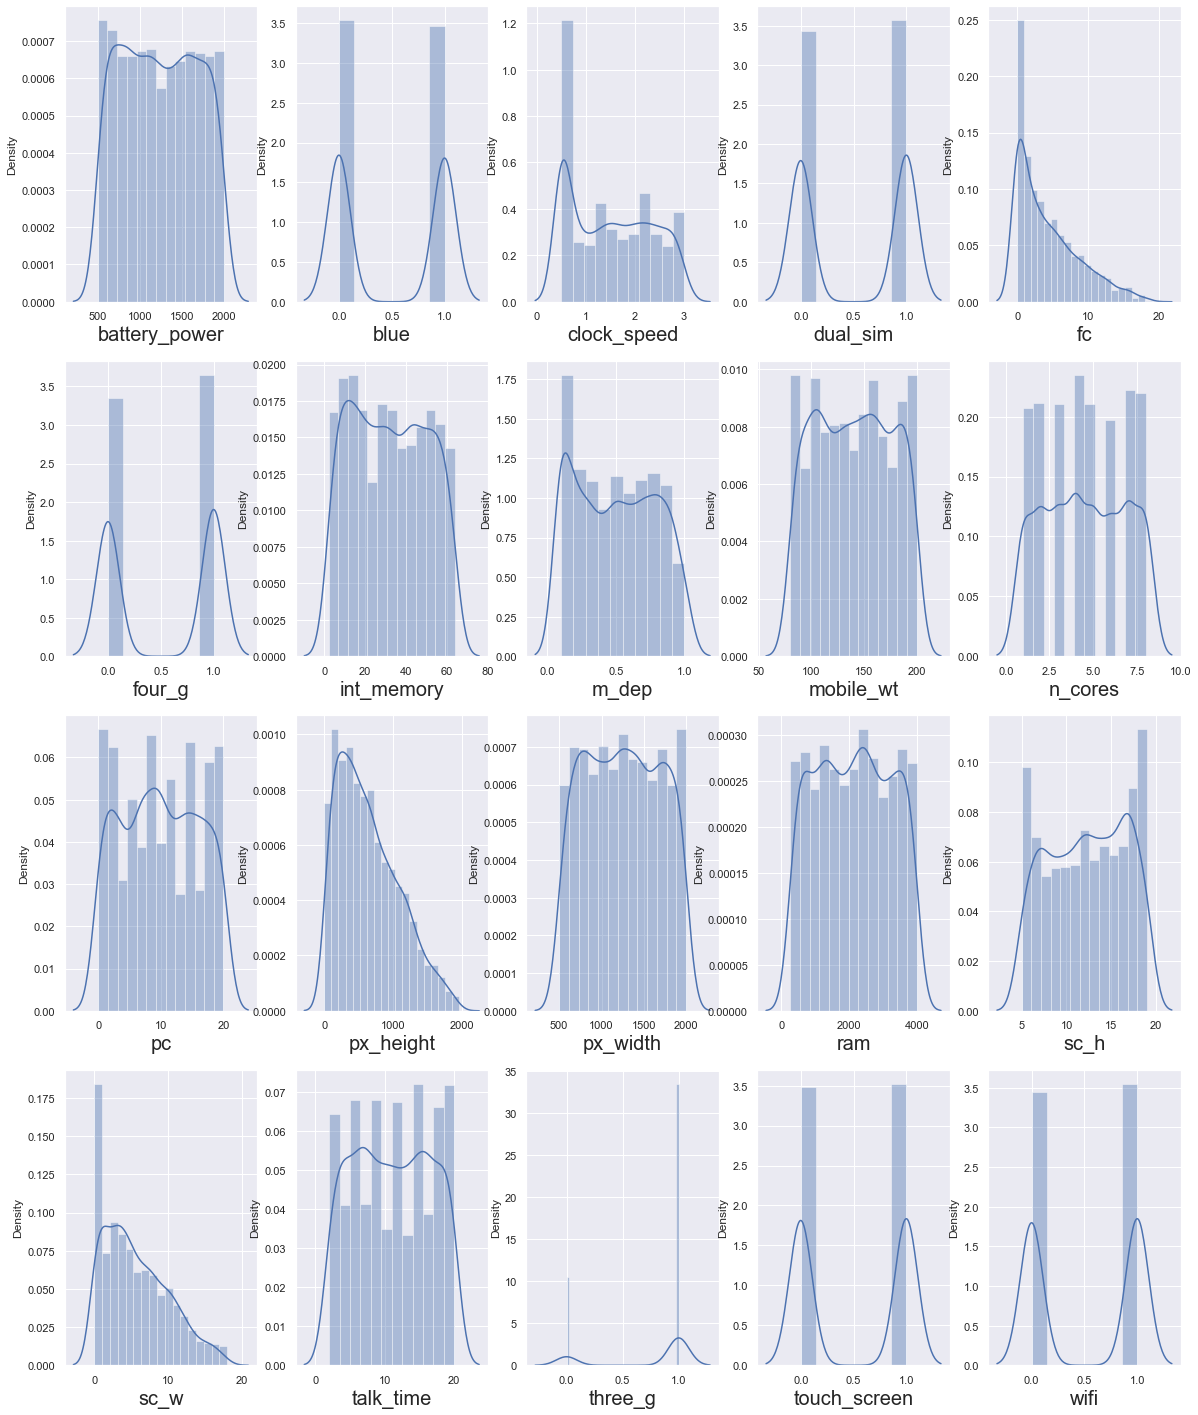

In [12]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_train:
    if plotnumber<=20 :    
        ax = plt.subplot(4,5,plotnumber)
        sns.distplot(data_train[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

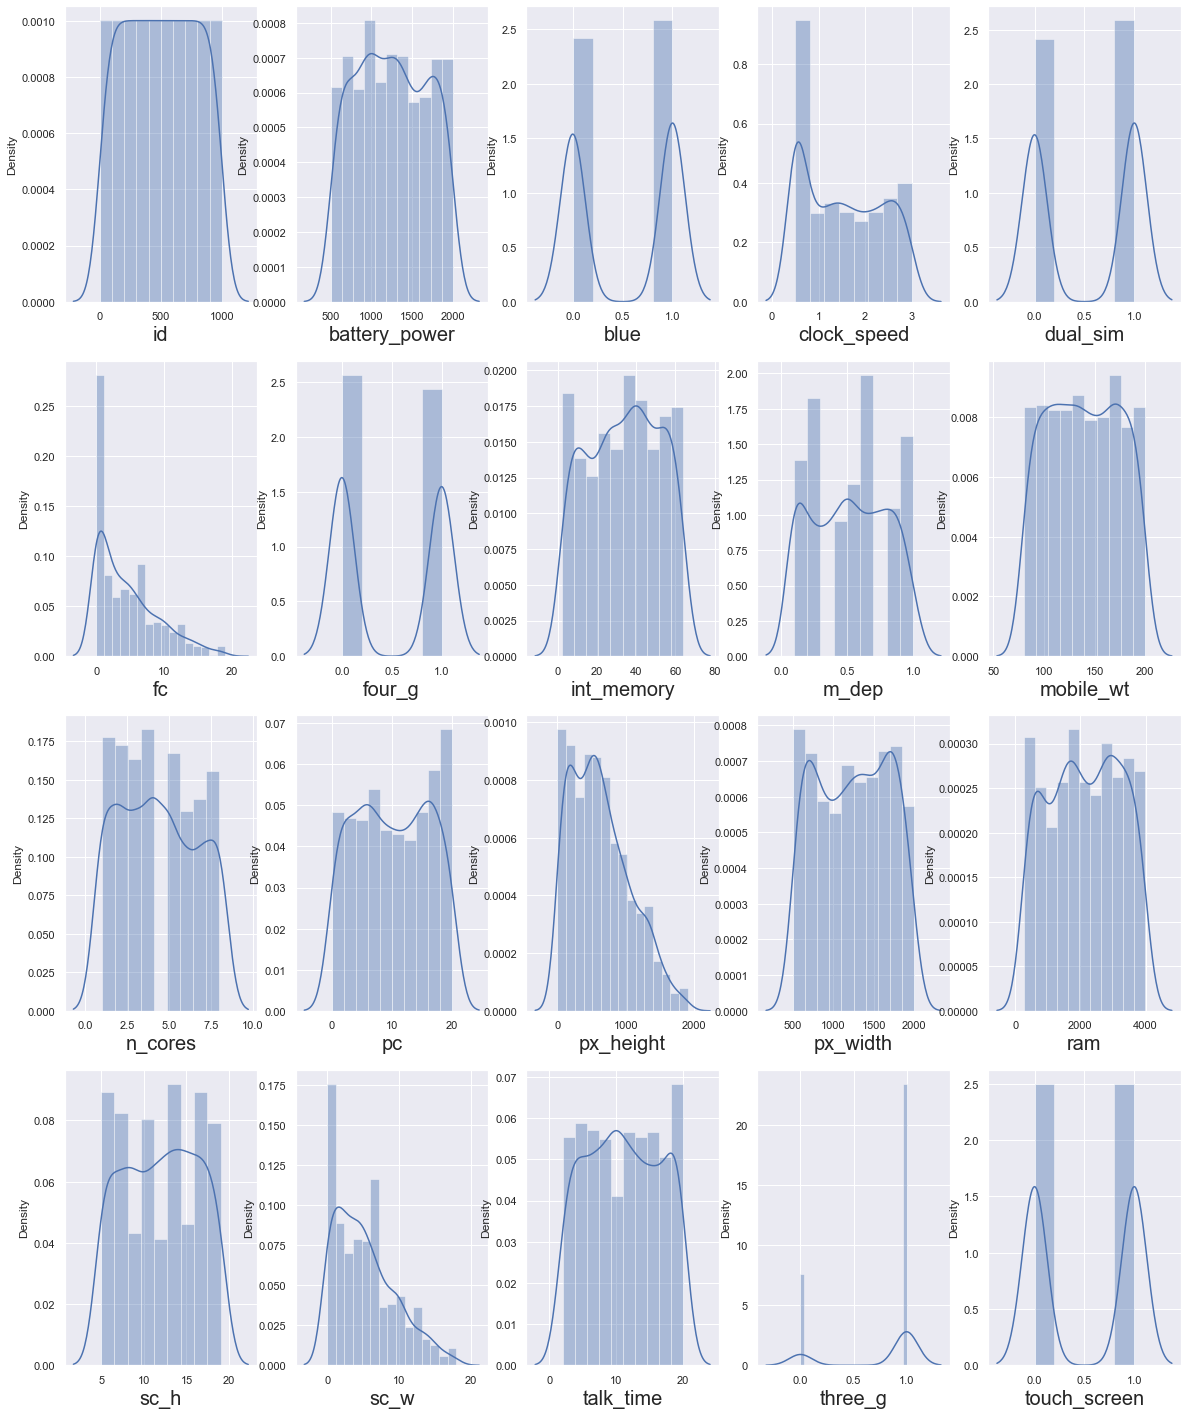

In [13]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_test:
    if plotnumber<=20 :    
        ax = plt.subplot(4,5,plotnumber)
        sns.distplot(data_test[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [14]:
data_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [15]:
data_train['battery_power'] = data_train['battery_power'].replace(0,data_train['battery_power'].mean())
data_train['blue'] = data_train['blue'].replace(0,data_train['blue'].mean())
data_train['clock_speed'] = data_train['clock_speed'].replace(0,data_train['clock_speed'].mean())
data_train['dual_sim'] = data_train['dual_sim'].replace(0,data_train['dual_sim'].mean())
data_train['fc'] = data_train['fc'].replace(0,data_train['fc'].mean())
data_train['four_g'] = data_train['four_g'].replace(0,data_train['four_g'].mean())
data_train['int_memory'] = data_train['int_memory'].replace(0,data_train['int_memory'].mean())
data_train['m_dep'] = data_train['m_dep'].replace(0,data_train['m_dep'].mean())
data_train['mobile_wt'] = data_train['mobile_wt'].replace(0,data_train['mobile_wt'].mean())
data_train['n_cores'] = data_train['n_cores'].replace(0,data_train['n_cores'].mean())
data_train['pc'] = data_train['pc'].replace(0,data_train['pc'].mean())
data_train['px_height'] = data_train['px_height'].replace(0,data_train['px_height'].mean())
data_train['px_width'] = data_train['px_width'].replace(0,data_train['px_width'].mean())
data_train['ram'] = data_train['ram'].replace(0,data_train['ram'].mean())
data_train['sc_h'] = data_train['sc_h'].replace(0,data_train['sc_h'].mean())
data_train['sc_w'] = data_train['sc_w'].replace(0,data_train['sc_w'].mean())
data_train['talk_time'] = data_train['talk_time'].replace(0,data_train['talk_time'].mean())
data_train['three_g'] = data_train['three_g'].replace(0,data_train['three_g'].mean())
data_train['touch_screen'] = data_train['touch_screen'].replace(0,data_train['touch_screen'].mean())
data_train['wifi'] = data_train['wifi'].replace(0,data_train['wifi'].mean())

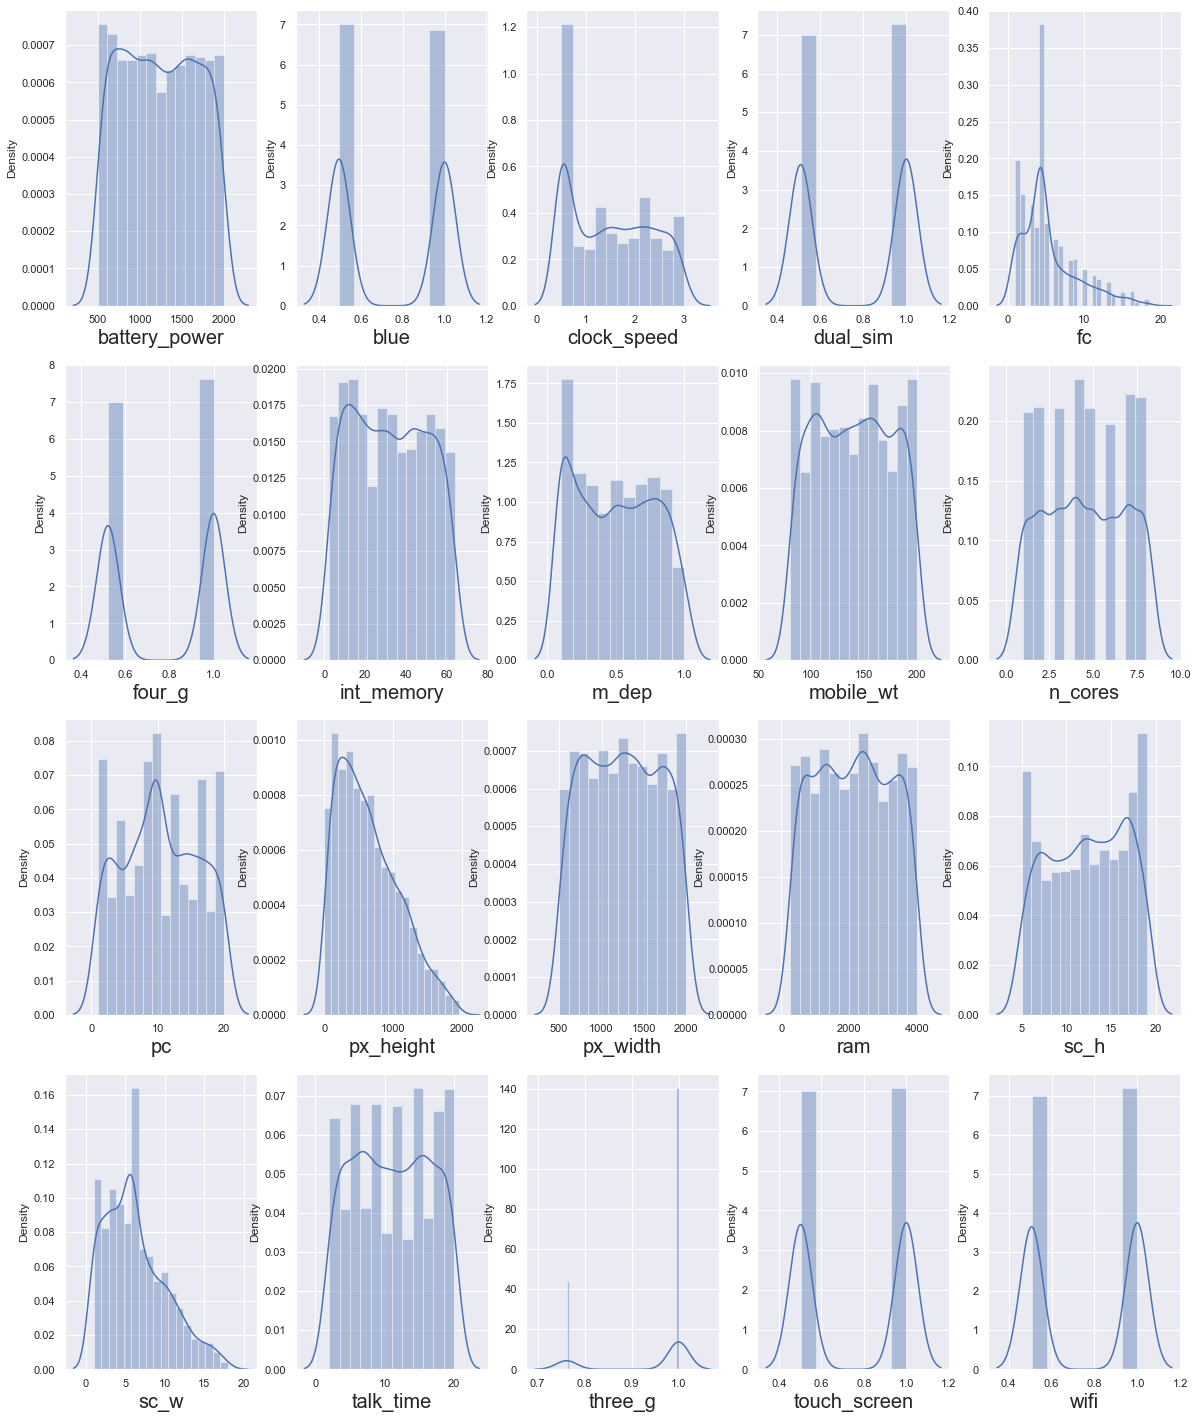

In [16]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_train:
    if plotnumber<=20 :    
        ax = plt.subplot(4,5,plotnumber)
        sns.distplot(data_train[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


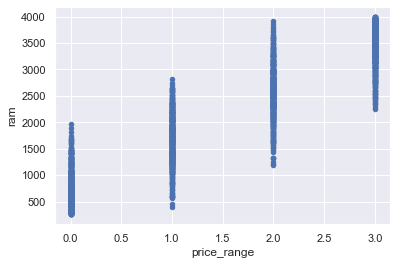

In [17]:
data_train.plot(x='price_range',y='ram',kind='scatter')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


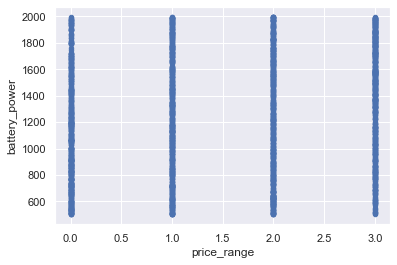

In [18]:
data_train.plot(x='price_range',y='battery_power',kind='scatter')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


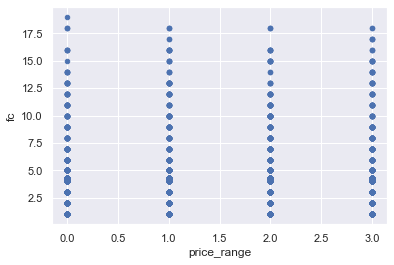

In [19]:
data_train.plot(x='price_range',y='fc',kind='scatter')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


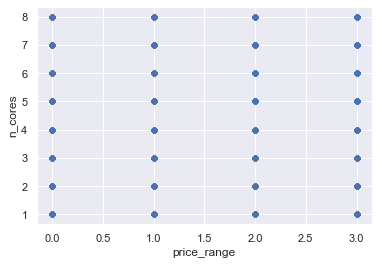

In [20]:
data_train.plot(x='price_range',y='n_cores',kind='scatter')
plt.show()

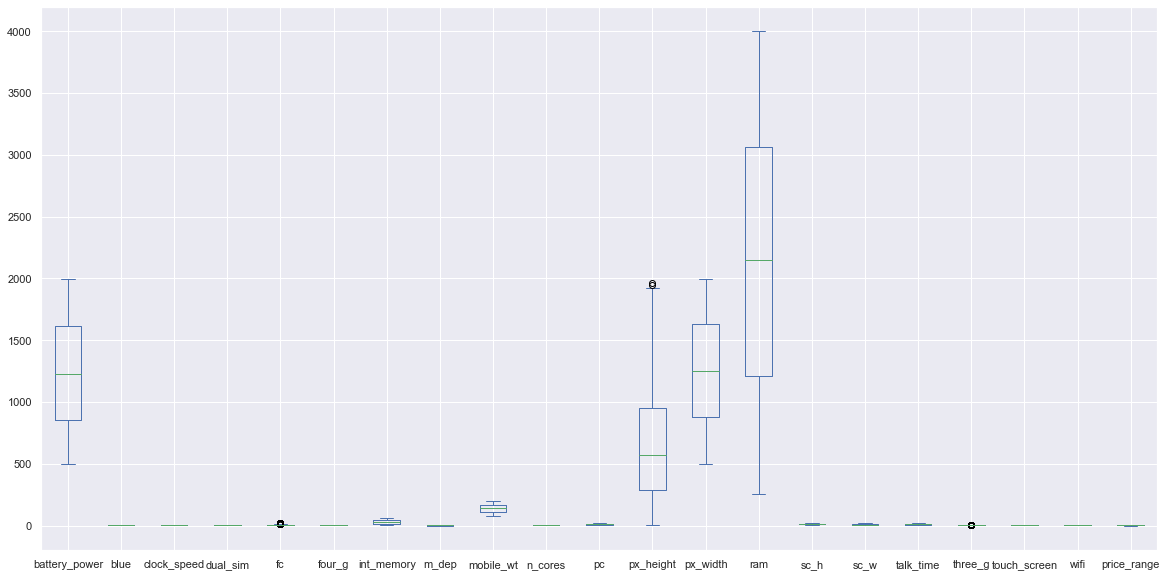

In [21]:
data_train.plot(kind='box',figsize=(20,10))
plt.show()

In [22]:
X = data_train.drop(columns = ['price_range'])
y = data_train['price_range']

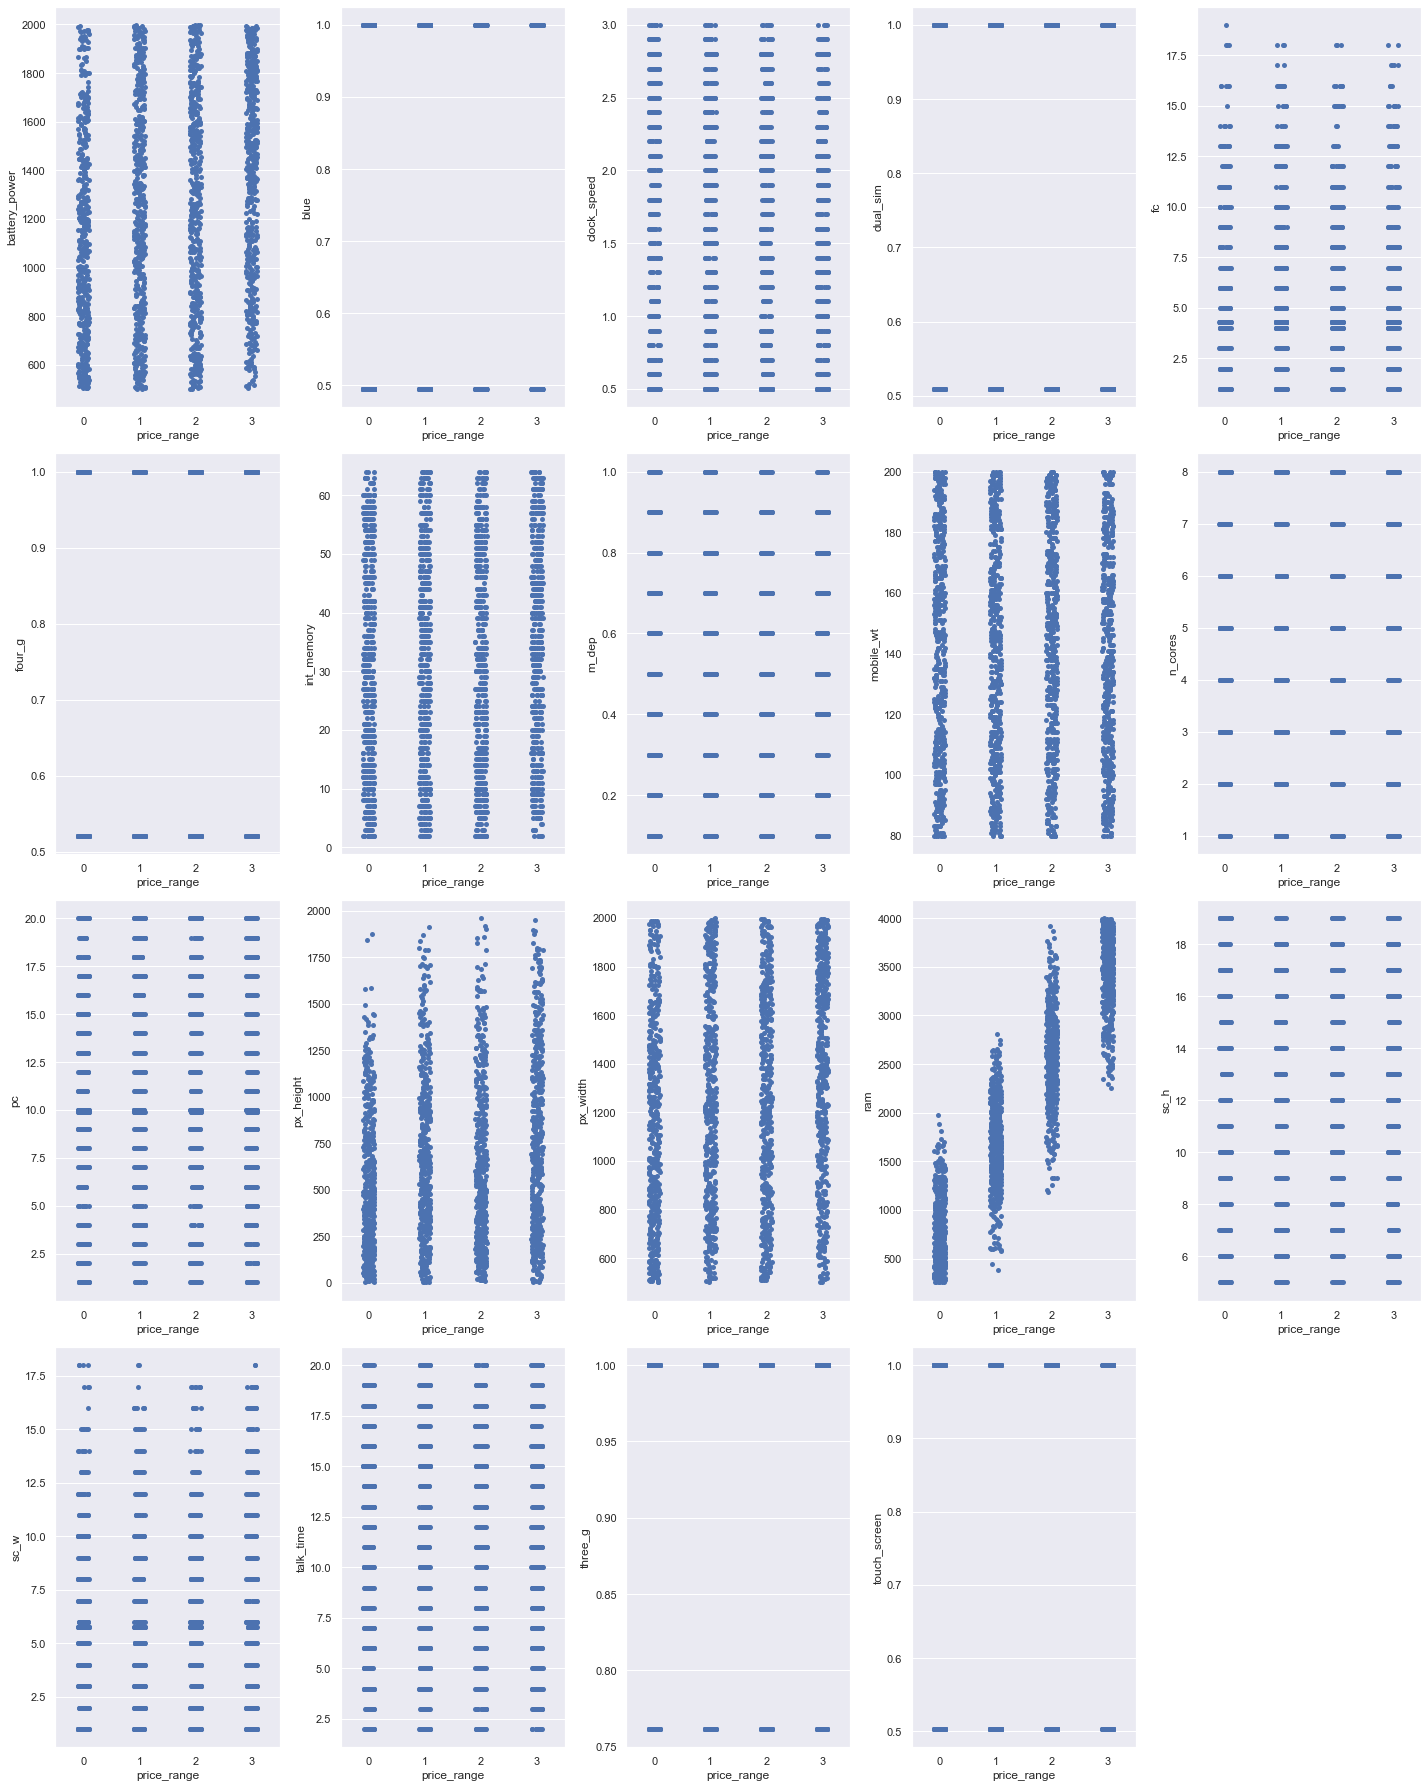

In [23]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=19 :
        ax = plt.subplot(4,5,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [24]:
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0.495,2.2,0.5095,1.0000,0.5215,7,0.6,188,2,2.0,20.0,756,2549,9,7.0,19,0.7615,0.503,1.000
1,1021,1.000,0.5,1.0000,4.3095,1.0000,53,0.7,136,3,6.0,905.0,1988,2631,17,3.0,7,1.0000,1.000,0.507
2,563,1.000,0.5,1.0000,2.0000,1.0000,41,0.9,145,5,6.0,1263.0,1716,2603,11,2.0,9,1.0000,1.000,0.507
3,615,1.000,2.5,0.5095,4.3095,0.5215,10,0.8,131,6,9.0,1216.0,1786,2769,16,8.0,11,1.0000,0.503,0.507
4,1821,1.000,1.2,0.5095,13.0000,1.0000,44,0.6,141,2,14.0,1208.0,1212,1411,8,2.0,15,1.0000,1.000,0.507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1.000,0.5,1.0000,4.3095,1.0000,2,0.8,106,6,14.0,1222.0,1890,668,13,4.0,19,1.0000,1.000,0.507
1996,1965,1.000,2.6,1.0000,4.3095,0.5215,39,0.2,187,4,3.0,915.0,1965,2032,11,10.0,16,1.0000,1.000,1.000
1997,1911,0.495,0.9,1.0000,1.0000,1.0000,36,0.7,108,8,3.0,868.0,1632,3057,9,1.0,5,1.0000,1.000,0.507
1998,1512,0.495,0.9,0.5095,4.0000,1.0000,46,0.1,145,5,5.0,336.0,670,869,18,10.0,19,1.0000,1.000,1.000


In [25]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [26]:
data_test=data_test.drop('id',axis=1)

In [27]:
data_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [28]:
data_test.shape

(1000, 20)

In [29]:
scalar=StandardScaler()

X_scaled = scalar.fit_transform(X)

data_test_std=scalar.fit_transform(data_test)

In [30]:
X_scaled

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [31]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.010243,battery_power
1,1.011920,blue
2,1.006357,clock_speed
3,1.011339,dual_sim
4,1.418705,fc
5,1.527756,four_g
6,1.009869,int_memory
7,1.006915,m_dep
8,1.004671,mobile_wt
9,1.007925,n_cores


In [32]:
data_test_std

array([[-0.47545131,  0.968496  ,  0.31260069, ..., -1.76021608,
         1.        , -1.01409939],
       [-0.94278218,  0.968496  , -1.25583195, ...,  0.56811207,
        -1.        , -1.01409939],
       [ 1.29207729,  0.968496  ,  1.51908734, ..., -1.76021608,
         1.        ,  0.98609664],
       ...,
       [-0.1469316 , -1.03252879, -0.16999397, ...,  0.56811207,
        -1.        , -1.01409939],
       [ 0.65817305,  0.968496  , -1.25583195, ..., -1.76021608,
         1.        , -1.01409939],
       [ 0.04971753,  0.968496  , -1.25583195, ...,  0.56811207,
        -1.        ,  0.98609664]])

# Training The Model

## Decision Tree

In [33]:
dt=DecisionTreeClassifier()

In [34]:
dt.fit(X_scaled,y)

DecisionTreeClassifier()

In [35]:
dt.predict(data_test_std)

array([3, 3, 3, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 1, 2, 0, 3, 2, 0, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 0, 1, 1, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 0, 3, 3, 2, 0, 2, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 1, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 3, 0, 2, 1, 0, 2, 0, 3, 1, 0, 0, 3, 1, 2, 0, 1, 2, 3,
       3, 2, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 3, 3, 2, 0, 1,
       1, 1, 3, 0, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 2, 2, 3, 3, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 0, 0, 2,
       1, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 1, 2, 2,
       2, 2, 1, 2, 3, 3, 3, 2, 2, 0, 0, 0, 1, 2, 0, 2, 3, 3, 1, 2, 0, 3,
       2, 2, 3, 0, 0, 1, 1, 3, 0, 1, 0, 2, 2, 1, 3, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 2, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 0, 2, 2, 1, 2,
       3, 3, 3, 1, 1, 0, 2, 2, 2, 1, 3, 2, 0, 3, 0, 0, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [36]:
data_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [37]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 0)

In [38]:
X_train

array([[-1.61052828, -0.9900495 , -0.51758998, ..., -1.78686097,
         0.99401789, -1.01409939],
       [-1.08014909,  1.0100505 , -0.39501094, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 1.30541911,  1.0100505 , -0.27243191, ...,  0.55964063,
         0.99401789,  0.98609664],
       ...,
       [-0.11044293, -0.9900495 ,  0.58562134, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.10816662, -0.9900495 ,  1.07593749, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.21217481, -0.9900495 , -1.2530642 , ...,  0.55964063,
        -1.00601811,  0.98609664]])

In [39]:
y_train

1045    2
937     2
1658    3
529     2
895     3
       ..
835     3
1216    1
1653    3
559     0
684     1
Name: price_range, Length: 1500, dtype: int64

In [40]:
X_test

array([[ 0.49050173,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-0.33352087,  1.0100505 , -1.2530642 , ..., -1.78686097,
         0.99401789, -1.01409939],
       [ 0.64984312,  1.0100505 ,  0.34046327, ...,  0.55964063,
        -1.00601811,  0.98609664],
       ...,
       [ 1.18477492,  1.0100505 , -0.14985287, ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.64922547,  1.0100505 ,  0.0953052 , ...,  0.55964063,
         0.99401789,  0.98609664],
       [ 0.39034429,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939]])

In [41]:
y_test

405     3
1190    0
1132    2
731     2
1754    2
       ..
936     3
1524    1
1415    2
1223    3
1548    2
Name: price_range, Length: 500, dtype: int64

In [42]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [43]:
y_pred = log_reg.predict(X_test)

In [44]:
log_reg_ac=accuracy_score(y_test,y_pred)

In [45]:
log_reg_ac

0.96

In [46]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[122,   2,   0,   0],
       [  3, 103,   4,   0],
       [  0,   5, 115,   5],
       [  0,   0,   1, 140]], dtype=int64)

In [47]:
y_train.unique()

array([2, 3, 0, 1], dtype=int64)

In [48]:
from sklearn.utils.multiclass import unique_labels
unique_labels(y_test)

array([0, 1, 2, 3], dtype=int64)

In [49]:
# combine these labels with the confusion matrix
def plot(y_true, y_pred):
    labels = unique_labels(y_test)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns=columns, index=index)
    return table

In [50]:
plot(y_test,y_pred)

,Predicted 0,Predicted 1,Predicted 2,Predicted 3
Actual 0,122,2,0,0
Actual 1,3,103,4,0
Actual 2,0,5,115,5
Actual 3,0,0,1,140


In [51]:
# combine these labels with the confusion matrix
def plot(y_true, y_pred):
    labels = unique_labels(y_test)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

<AxesSubplot:>

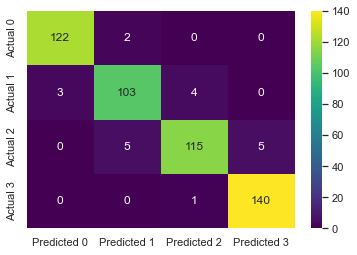

In [52]:
plot(y_test,y_pred)

In [92]:
class_labels = ["battery_power", "blue", "clock_speed", "dual_sim"]

In [96]:
class_labels1 = ["fc", "four_g", "int_memory", "m_dep"]

In [99]:
class_labels2 = ["mobile_wt", "n_cores", "pc", "px_height"]

In [100]:
class_labels3 = ["px_width", "ram", "sc_h", "sc_w"]

In [102]:
class_labels4 = ["talk_time", "three_g", "touch_screen", "wifi"]

In [97]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred, target_names=class_labels)
print(cr)

               precision    recall  f1-score   support

battery_power       0.98      0.98      0.98       124
         blue       0.94      0.94      0.94       110
  clock_speed       0.96      0.92      0.94       125
     dual_sim       0.97      0.99      0.98       141

     accuracy                           0.96       500
    macro avg       0.96      0.96      0.96       500
 weighted avg       0.96      0.96      0.96       500



In [98]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred, target_names=class_labels1)
print(cr)

              precision    recall  f1-score   support

          fc       0.98      0.98      0.98       124
      four_g       0.94      0.94      0.94       110
  int_memory       0.96      0.92      0.94       125
       m_dep       0.97      0.99      0.98       141

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



In [103]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred, target_names=class_labels2)
print(cr)

              precision    recall  f1-score   support

   mobile_wt       0.98      0.98      0.98       124
     n_cores       0.94      0.94      0.94       110
          pc       0.96      0.92      0.94       125
   px_height       0.97      0.99      0.98       141

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



In [104]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred, target_names=class_labels3)
print(cr)

              precision    recall  f1-score   support

    px_width       0.98      0.98      0.98       124
         ram       0.94      0.94      0.94       110
        sc_h       0.96      0.92      0.94       125
        sc_w       0.97      0.99      0.98       141

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



In [105]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred, target_names=class_labels4)
print(cr)

              precision    recall  f1-score   support

   talk_time       0.98      0.98      0.98       124
     three_g       0.94      0.94      0.94       110
touch_screen       0.96      0.92      0.94       125
        wifi       0.97      0.99      0.98       141

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500

